In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

file_path = 'results/evaluation.csv'  # Update the file path accordingly
image_dir = 'results/graphs/'

# Incase you do not have an image dir create one by uncommenting the following line
# os.mkdir(image_dir)

data = pd.read_csv(file_path, encoding='latin-1')

# Display the first few rows of the DataFrame to verify data loading
print(data.head())

   UserID       Genre                                       MovieInfo_RS  \
0     1.0  ['Action']  [{'Movie': 'North by Northwest (1959)', 'Rank'...   
1     2.0  ['Action']  [{'Movie': 'North by Northwest (1959)', 'Rank'...   
2     3.0  ['Action']  [{'Movie': 'Aliens (1986)', 'Rank': 1, 'Rating...   
3     4.0  ['Action']  [{'Movie': 'City of God (Cidade de Deus) (2002...   
4     5.0  ['Action']  [{'Movie': 'Apocalypse Now (1979)', 'Rank': 1,...   

                                       MovieInfo_LLM  \
0  [{'Movie': 'North by Northwest (1959)', 'Rank'...   
1  [{'Movie': 'Star Wars: Episode V - The Empire ...   
2  [{'Movie': 'Blade Runner (1982)', 'Rank': '1',...   
3  [{'Movie': 'City of God (Cidade de Deus)', 'Ra...   
4  [{'Movie': 'Lord of the Rings: The Return of t...   

                                          Ratings_RS  \
0  [4.99 5.   4.92 5.   4.9  4.9  5.   5.   4.91 ...   
1  [4.31 4.34 4.4  4.43 4.31 4.34 4.54 4.35 4.39 ...   
2  [4.39 4.17 4.34 4.24 4.22 4.26 4.18

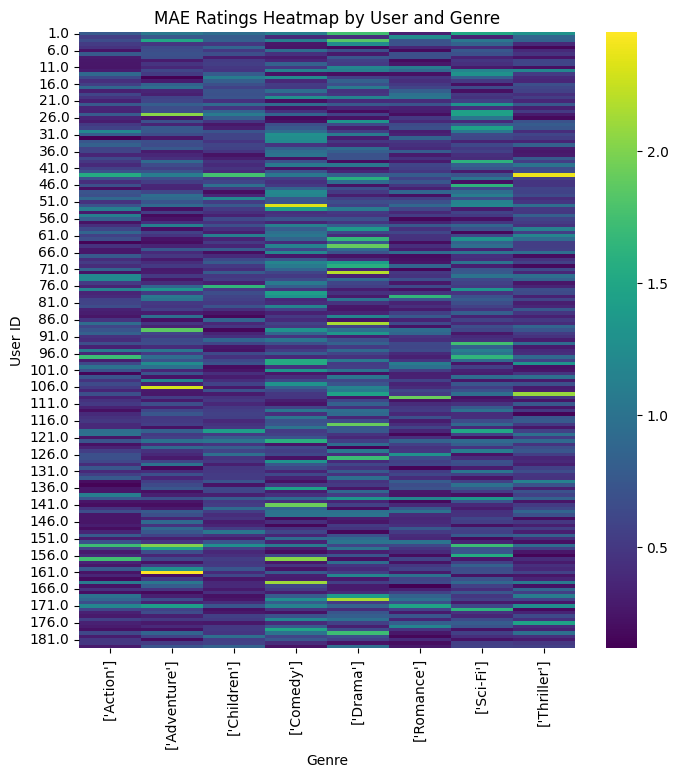

In [5]:
# Pivot the data to create a user-genre matrix with MAE ratings
pivot_data = data.pivot_table(index='UserID', columns='Genre', values='MAE_Ratings')

# Plotting a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(pivot_data, cmap='viridis', fmt=".2f", linewidths=0)
plt.xlabel('Genre')
plt.ylabel('User ID')
plt.title('MAE Ratings Heatmap by User and Genre')
plt.savefig(f"{image_dir}/MAE_Ratings_HeatMap.png")
plt.show()
plt.close()

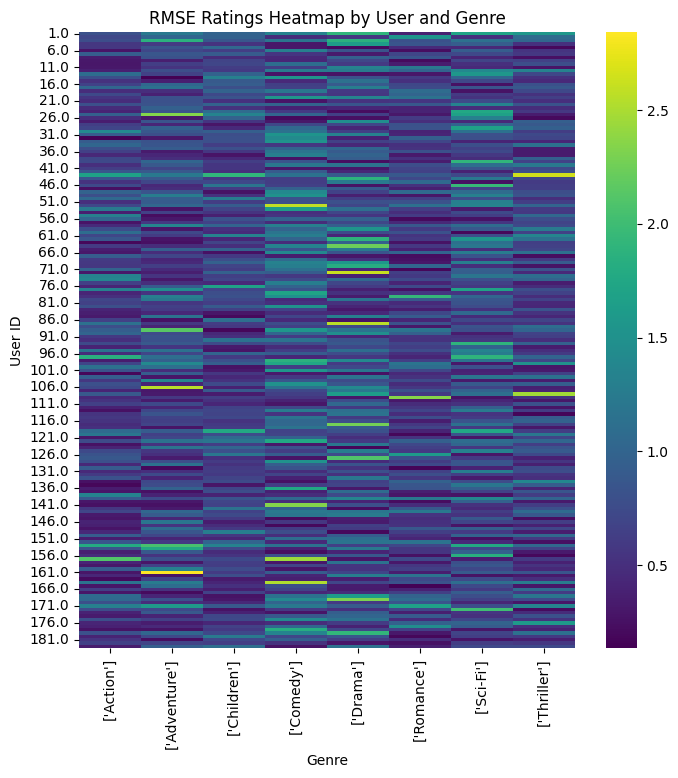

In [6]:
# Pivot the data to create a user-genre matrix with RMSE ratings
pivot_data = data.pivot_table(index='UserID', columns='Genre', values='RMSE_Ratings')

# Plotting a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(pivot_data, cmap='viridis', fmt=".2f", linewidths=0)
plt.xlabel('Genre')
plt.ylabel('User ID')
plt.title('RMSE Ratings Heatmap by User and Genre')
plt.savefig(f"{image_dir}/RMSE_Ratings_HeatMap.png")
plt.show()


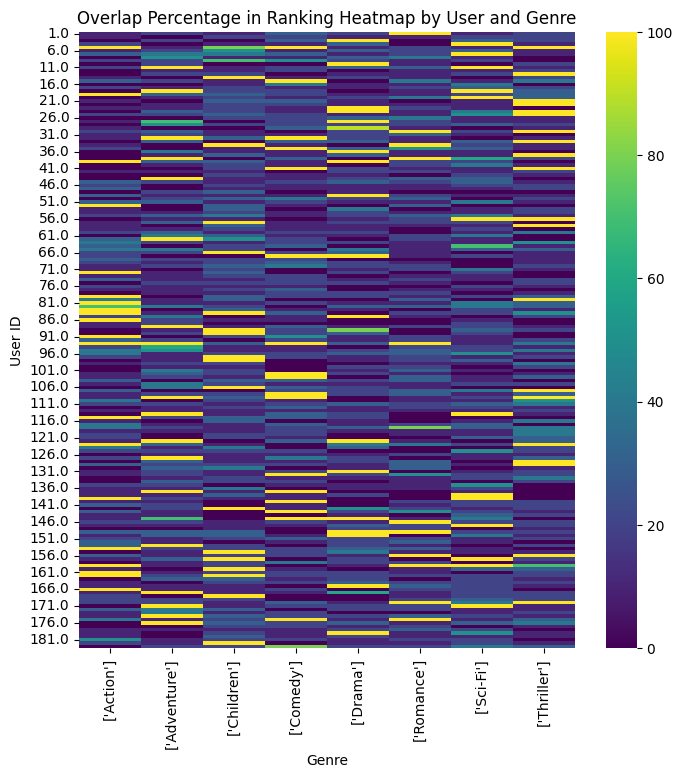

In [7]:
# Pivot the data to create a user-genre matrix with Overlap Percentage Rankings
pivot_data = data.pivot_table(index='UserID', columns='Genre', values='OverlapPercentage_Rankings')

# Plotting a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(pivot_data, cmap='viridis', fmt=".2f", linewidths=0)
plt.xlabel('Genre')
plt.ylabel('User ID')
plt.title('Overlap Percentage in Ranking Heatmap by User and Genre')
plt.savefig(f"{image_dir}/Overlap_Rankings_HeatMap.png")
plt.show()


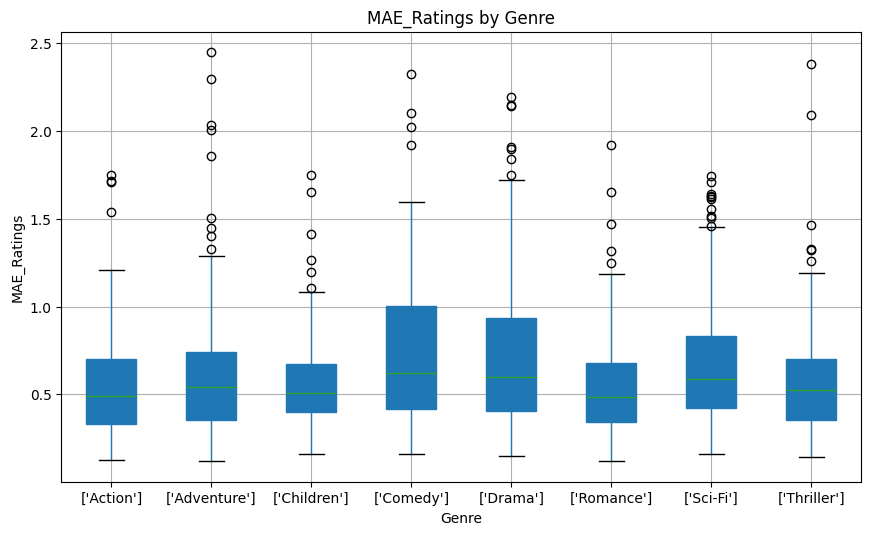

In [8]:
boxplot = data.boxplot(column='MAE_Ratings', by='Genre', figsize=(10, 6), patch_artist=True)

# Customize the plot
plt.title('MAE_Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('MAE_Ratings')
plt.suptitle('')  # Remove auto-generated subplot title
plt.savefig(f"{image_dir}/MAE_Ratings_BoxPlot.png")
# Show the plot
plt.show()


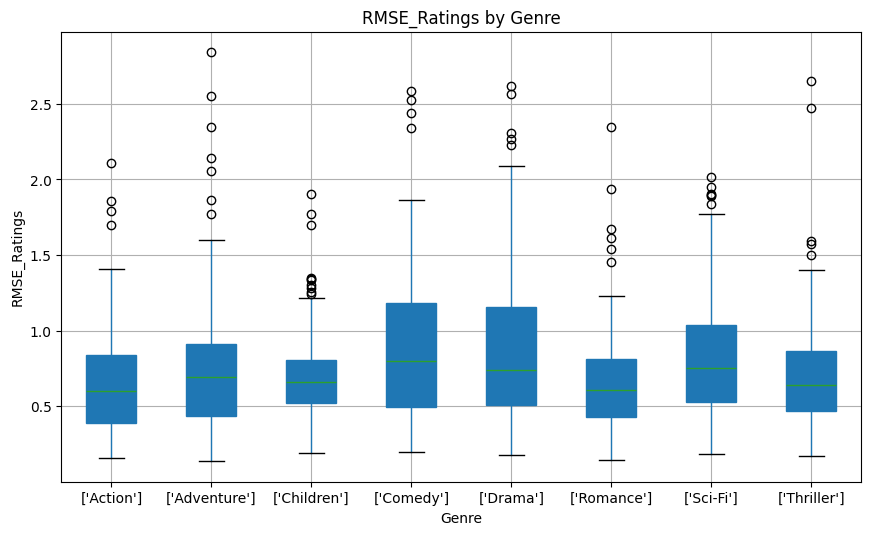

In [9]:
boxplot = data.boxplot(column='RMSE_Ratings', by='Genre', figsize=(10, 6), patch_artist=True)

# Customize the plot
plt.title('RMSE_Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('RMSE_Ratings')
plt.suptitle('')  # Remove auto-generated subplot title
plt.savefig(f"{image_dir}/RMSE_Ratings_BoxPlot.png")
# Show the plot
plt.show()


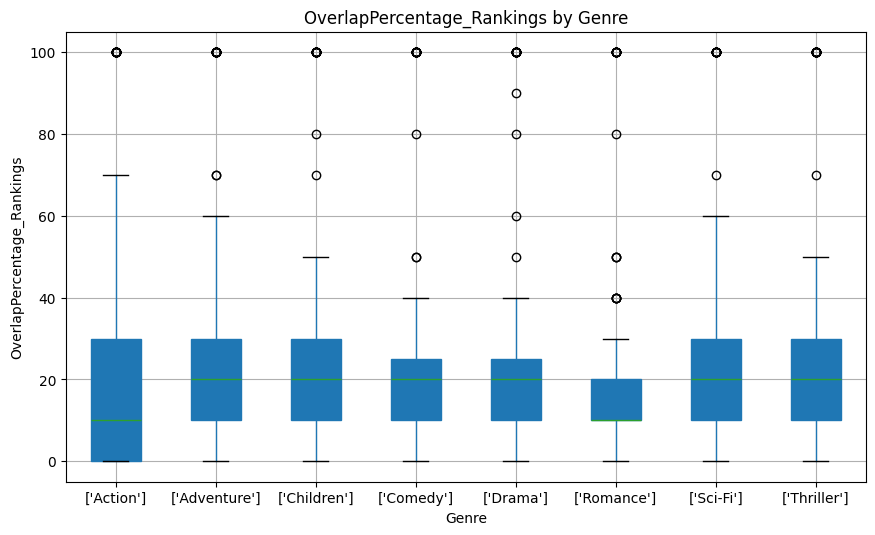

In [10]:
boxplot = data.boxplot(column='OverlapPercentage_Rankings', by='Genre', figsize=(10, 6), patch_artist=True)

# Customize the plot
plt.title('OverlapPercentage_Rankings by Genre')
plt.xlabel('Genre')
plt.ylabel('OverlapPercentage_Rankings')
plt.suptitle('')  # Remove auto-generated subplot title
plt.savefig(f"{image_dir}/Overlap_Rankings_BoxPlot.png")
# Show the plot
plt.show()


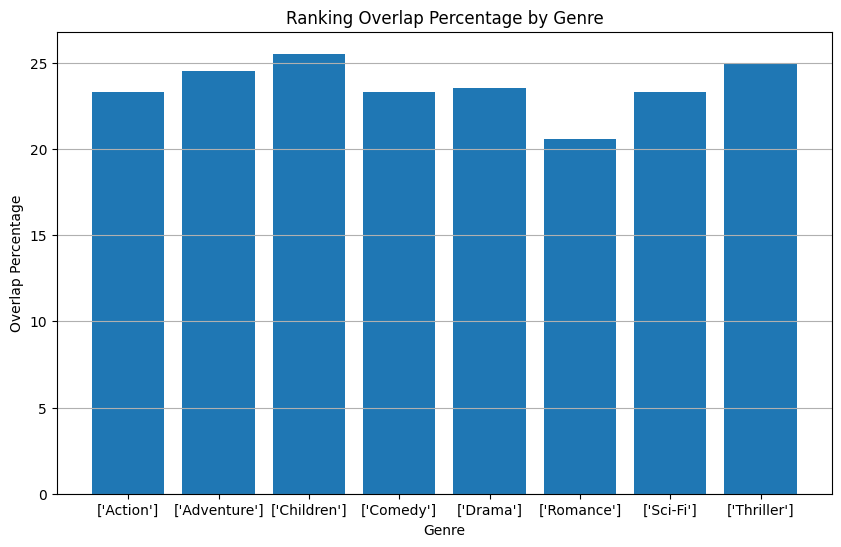

In [11]:
overlap_by_genre = data.groupby('Genre')['OverlapPercentage_Rankings'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(overlap_by_genre['Genre'], overlap_by_genre['OverlapPercentage_Rankings'])
plt.xlabel('Genre')
plt.ylabel('Overlap Percentage')
plt.title('Ranking Overlap Percentage by Genre')
plt.grid(axis='y')
plt.savefig(f"{image_dir}/Overlap_Rankings_BarGraph.png")
plt.show()


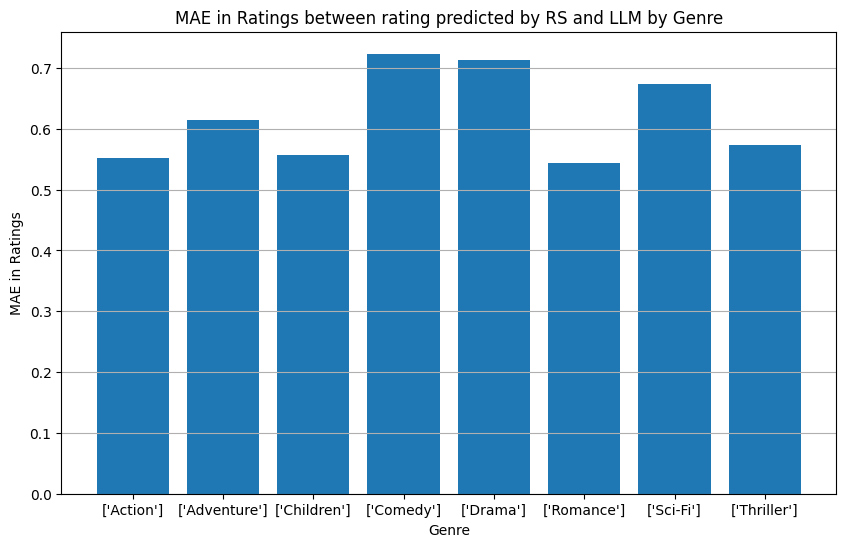

In [12]:
overlap_by_genre = data.groupby('Genre')['MAE_Ratings'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(overlap_by_genre['Genre'], overlap_by_genre['MAE_Ratings'])
plt.xlabel('Genre')
plt.ylabel('MAE in Ratings')
plt.title('MAE in Ratings between rating predicted by RS and LLM by Genre')
plt.grid(axis='y')

plt.savefig(f"{image_dir}/MAE_Ratings_BarGraph.png")
plt.show()

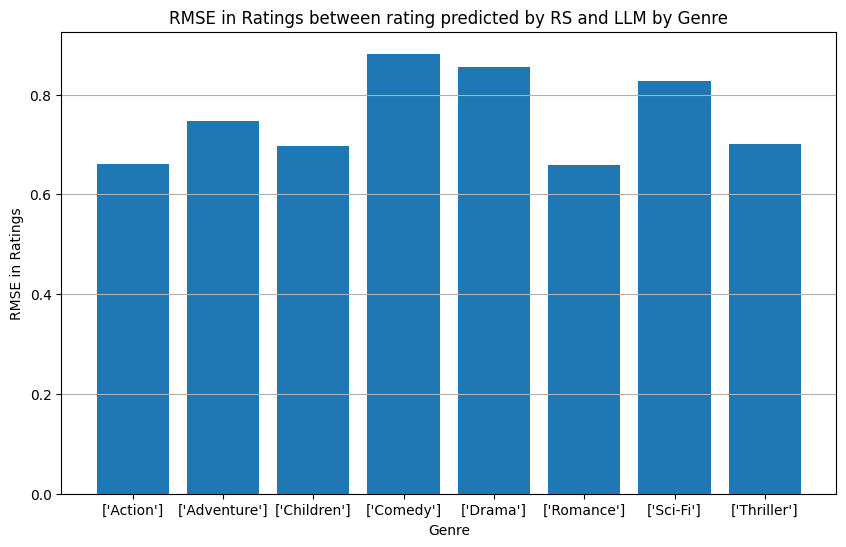

In [13]:
overlap_by_genre = data.groupby('Genre')['RMSE_Ratings'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(overlap_by_genre['Genre'], overlap_by_genre['RMSE_Ratings'])
plt.xlabel('Genre')
plt.ylabel('RMSE in Ratings')
plt.title('RMSE in Ratings between rating predicted by RS and LLM by Genre')
plt.grid(axis='y')

plt.savefig(f"{image_dir}/RMSE_Ratings_BarGraph.png")
plt.show()